<a href="https://colab.research.google.com/github/MJ260889/Natural_Language_Processing-NLP-/blob/main/Natural_Language_Processing(NLP)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python-m spacy download en_core_web_md

/bin/bash: python-m: command not found


In [ ]:
!pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np #linear algebra
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import string #Special opertaions on strings
import spacy #language models
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [ ]:
import pandas
book=pd.read_csv("https://raw.githubusercontent.com/slmsshk/DataSet/main/apple.txt",error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 6: expected 1 fields, saw 14\n'


In [ ]:
book

,x
0,It's amazing..... battery last around 10 -12 h...
1,Finally a MacBook possession. Got it in 50k in...
2,Best Laptop under 60k. If you don't want any a...
3,Pros:1. Light weight and super fast response t...
4,""""
5,I am very upset about the product as I checked...
6,Reason for 1 star is I ot an defective piece. ...
7,Got the Apple Macbook air on amazon discount s...
8,White line coming on screen in just three mont...
9,"Bought this product recently on 5 April, was w..."


In [ ]:
book=[x.strip() for x in book.x]  #remove both the leading and the trailing characters
book=[x for x in book if x] #removes empty strings,because they are considered in Python as False
book[0:10]

["It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders",
 "Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by wo

In [ ]:
book

["It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders",
 "Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by wo

In [ ]:
#Joining the list into one string/text
text=' '.join(book)
text

'It\'s amazing..... battery last around 10 -12 hrs.....best laptop for students and coders Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can\'t be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by worki

In [ ]:
#Punctutaion
no_punc_text=text.translate(str.maketrans('','',string.punctuation))  #with arguments (x,y,z) where 'x' and 'y'
#must be equal-length strings and charcaters in'x'
#are replaced by charcaters in 'y'.'z'
#s a string (string.punctutaion here)
no_punc_text

'Its amazing battery last around 10 12 hrsbest laptop for students and coders Finally a MacBook possession Got it in 50k in Diwali sale Technically good laptopGood Newsluxury product niche technology good battery life reliable machine other laptops crash and become defunct in 610 years no antivirus required security of data and transactions much better Terrific sense of possession  prideBad News Problems will be there if you are switching from windows based system  very less space in hard disk no CD drive inability to transfer data from Mac to your existing external hard disc unless you format it apps are mostly paid and re unreasonably expensive no free apps which are available otherwise on google play store even the angry bird costs Rs 400  all printers are not compatible eg the most economical MFD laser printer RICOH SP 111 cant be used huge compatibility issues with Pages MS Word and Keynote powerpoint unless you master it by working on these still mostly the document and slides ei

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#Normalize the data
lower_words=[x.lower() for x in no_punc_text]
print(lower_words[0:25])

['i', 't', 's', ' ', 'a', 'm', 'a', 'z', 'i', 'n', 'g', ' ', 'b', 'a', 't', 't', 'e', 'r', 'y', ' ', 'l', 'a', 's', 't', ' ']


In [ ]:
from wordcloud import WordCloud,STOPWORDS


In [ ]:
#Define a function to plot word cloud
def plot_cloud(wordcloud):
  #Set figure size
  plt.figure(figsize=(40,30))
  #Display image
  plt.imshow(wordcloud)
  #No axis details
  plt.axis("off");

In [ ]:
#Generate wordcloud
stopwords=STOPWORDS
stopwords.add('will')
stopwords.add('apple')
stopwords.add('Amazon')
stopwords.add('laptop')

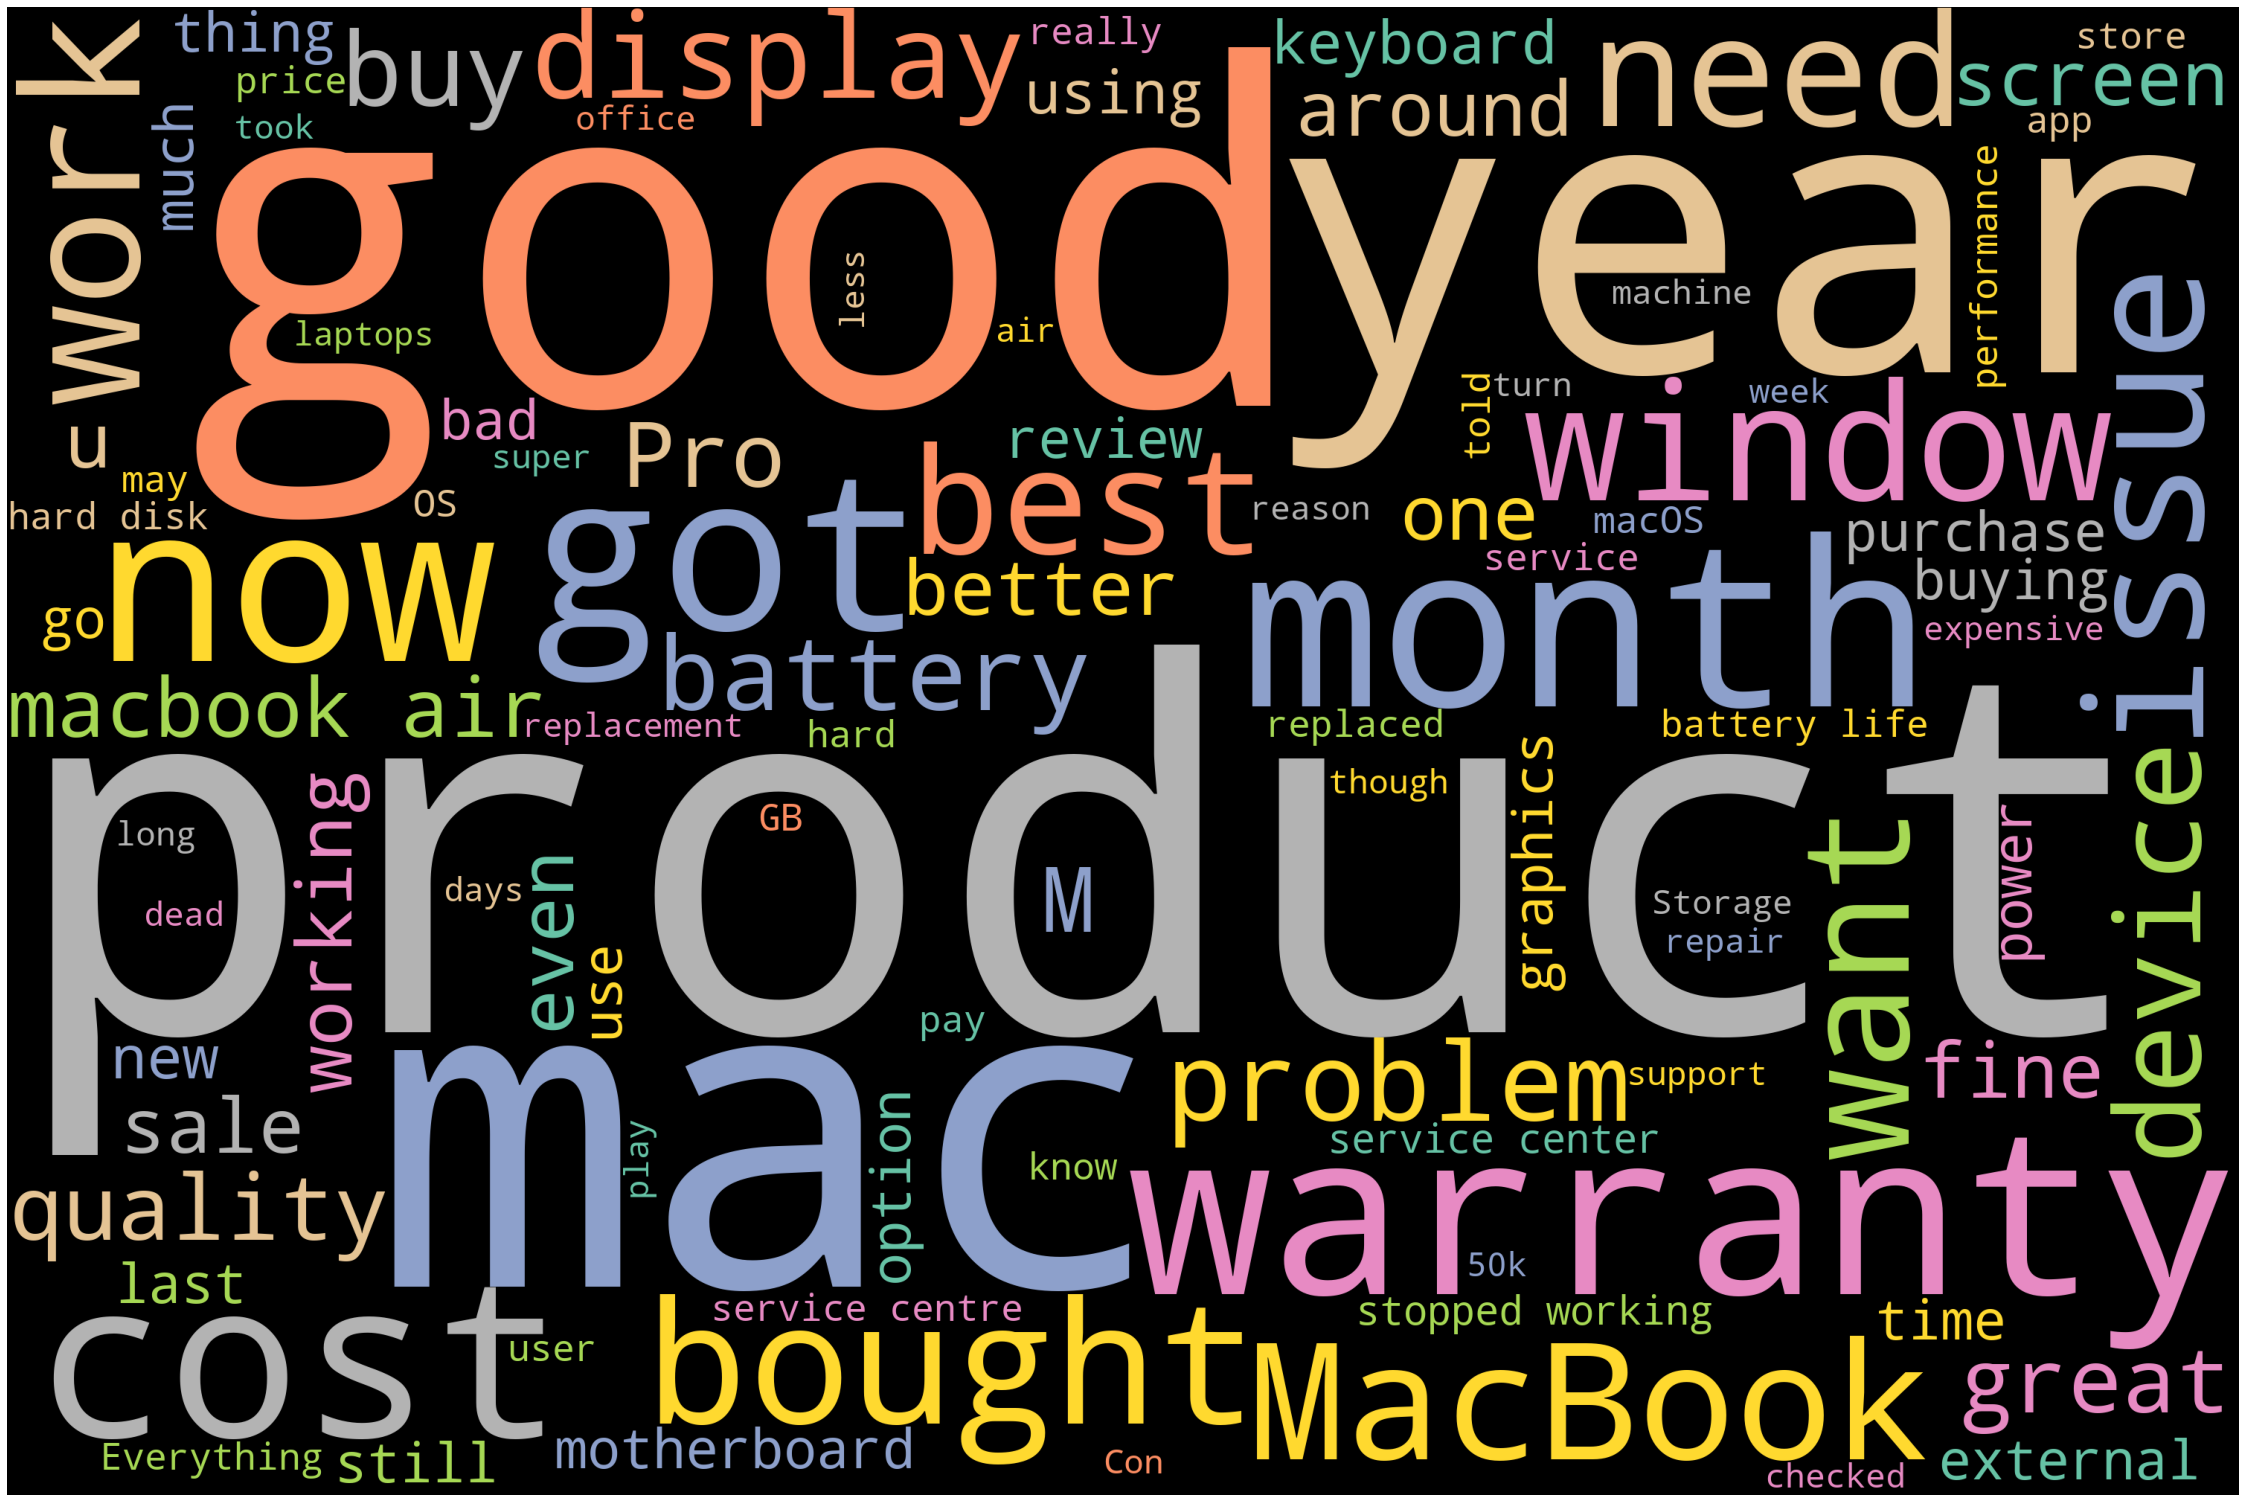

In [ ]:
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
#plot
plot_cloud(wordcloud)